source: https://www.kaggle.com/datasets/martholi/inbreast

In [1]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import random

import torch
from torchvision import datasets
import torchvision.transforms as transforms
from torchvision.io import read_image
from torch.utils.data import Dataset
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import os
import cv2
import glob
from skimage import io

from skimage import data
from skimage import filters
from skimage.color import rgb2gray
from skimage.io import imread

In [10]:
# df = pd.read_excel('./../Datasets/INbreast/INbreast.xls')
# df.head(5)

In [17]:
df = pd.read_csv('./../Datasets/INbreast/INbreast.csv')
print(df.shape[0])
df.head(5)

412


,Patient ID,Patient age,Laterality,View,Acquisition date,File Name,ACR,Bi-Rads,Mass,Micros,Distortion,Asymmetry,Findings Notes (in Portuguese),Other Notes,Lesion Annotation Status,Pectoral Muscle Annotation,Other Annotations
0,removed,removed,R,CC,201001.0,22678622.0,4,1,NaN,NaN,NaN,NaN,normal,NaN,No annotation (Normal),NaN,NaN
1,removed,removed,L,CC,201001.0,22678646.0,4,3,X,NaN,NaN,NaN,nódulo,NaN,NaN,NaN,NaN
2,removed,removed,R,MLO,201001.0,22678670.0,4,1,NaN,NaN,NaN,NaN,normal,NaN,No annotation (Normal),NaN,NaN
3,removed,removed,L,MLO,201001.0,22678694.0,4,3,X,NaN,NaN,NaN,nódulo,NaN,NaN,NaN,NaN
4,removed,removed,R,CC,201001.0,22614074.0,2,5,X,X,NaN,NaN,nódulo QSE + micros,NaN,NaN,NaN,NaN


In [13]:
import pydicom

# Load the DICOM file
dcm_file = pydicom.dcmread('./../Datasets/INbreast/ALL-IMGS/20586908_6c613a14b80a8591_MG_R_CC_ANON.dcm')

# # Access the metadata
# print(dcm_file.PatientName)
# print(dcm_file.PatientID)

In [14]:
dcm_file

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 208
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.9590.100.1.1.241740140812485214905427915863105056665
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.9590.100.1.0.100.4.0
(0002, 0013) Implementation Version Name         SH: 'MATLAB IPT 4.0'
-------------------------------------------------
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.9590.100.1.1.241740140812485214905427915863105056665
(0008, 0020) Study Date                          DA: ''
(0008, 0023) Content Date                        DA: '20111229'
(0008, 0030) Stud

In [15]:
# Access the pixel data
pixel_data = dcm_file.pixel_array
pixel_data.shape

(4084, 3328)

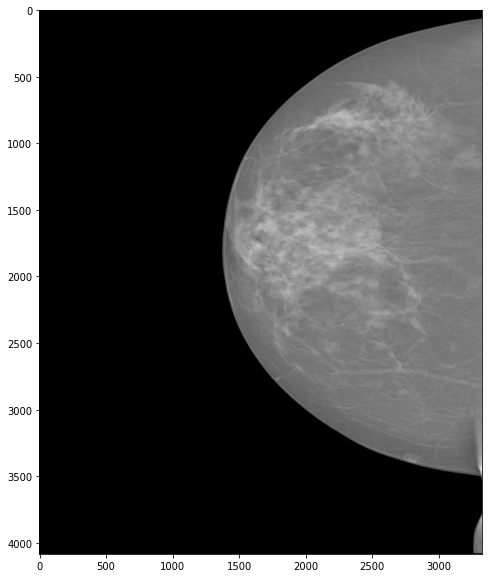

In [16]:
fig = plt.figure(figsize=(10,10))
plt.imshow(pixel_data, cmap='gray')
plt.show()

In [5]:
# path='./../Datasets/MIAS_mammography/all-mias/'
# images_path=[]
# all_imgs = sorted(os.listdir(path))
# for i in all_imgs:
#     if '.pgm' in i:
#         images_path.append('./../MIAS_mammography/' + i)
